# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/carInsurance_train.csv')

In [3]:
data[0:10]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
6,7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
7,8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
8,9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0
9,10,30,blue-collar,married,secondary,0,3,1,1,cellular,12,may,2,-1,0,NaN,09:22:20,09:27:46,0


In [4]:
len(data)

4000

In [5]:
len(data.columns)

19

# Distribution of target variables

* Number of positive examples accounts for 40% of the overall data and negative samples accounts for 60% of the data
* There is no class imbalance in the dataset


In [6]:
print(data.groupby('CarInsurance').size())
print((data.groupby('CarInsurance').size()/len(data))*100)

CarInsurance
0    2396
1    1604
dtype: int64
CarInsurance
0    59.9
1    40.1
dtype: float64


# Holding out 20% of the sample for test dataset

* Performing stratified sampling
* X_train, y_train - training dataset
* X_test, y_test - test dataset (hold-out)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop('CarInsurance', axis=1)
target = data['CarInsurance']
X_train, X_test, y_train, y_test = train_test_split(X, target,  test_size=0.2, random_state=1)

In [9]:
len(X_train)

3200

In [10]:
len(X_test)

800

In [24]:
X_train.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,call_duration
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,41.267500,0.014063,1490.068750,0.491250,0.130938,15.758750,2.604062,48.874063,0.705313,350.238125
std,11.601045,0.117767,3128.974436,0.500002,0.337385,8.481297,3.078800,107.294135,1.886852,341.064875
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,5.000000
25%,32.000000,0.000000,112.500000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,126.750000
50%,39.000000,0.000000,537.000000,0.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,234.000000
75%,49.000000,0.000000,1610.500000,1.000000,0.000000,22.000000,3.000000,-1.000000,0.000000,459.250000
max,95.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,43.000000,842.000000,30.000000,3253.000000


In [28]:
X_train[X_train.DaysPassed<0]['PrevAttempts'].unique()

array([0])

# CallStart and CallEnd is converted to call duration


In [11]:
import datetime as dt


In [12]:
call_duration_arr = []
for index, row in X_train.iterrows():
    
    call_start = row['CallStart'] 
    call_end = row['CallEnd']
    call_start_hr = call_start.split(':')[0]
    call_start_min = call_start.split(':')[1]
    call_start_sec = call_start.split(':')[2]
    
    call_end_hr = call_end.split(':')[0]
    call_end_min = call_end.split(':')[1]
    call_end_sec = call_end.split(':')[2]
    
    call_start_dt = dt.datetime(2013,12,30,int(call_start_hr),int(call_start_min),int(call_start_sec))
    call_end_dt = dt.datetime(2013,12,30,int(call_end_hr),int(call_end_min),int(call_end_sec))

    call_duration = (call_end_dt-call_start_dt).total_seconds()
    call_duration_arr.append(call_duration)
    
X_train['call_duration'] = call_duration_arr

/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
X_train.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'call_duration'],
      dtype='object')

# Removing ID, CallStart and CallEnd column

* CallStart and CallEnd is already being converted to call_duration

In [14]:

if len(set(['Id', 'CallStart', 'CallEnd']) - set(list(X_train.columns)))<1:
    X_train = X_train.drop(['Id', 'CallStart', 'CallEnd'], axis=1)

In [15]:
X_train.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'call_duration'],
      dtype='object')

# Missing value Counts

In [16]:
print(X_train.isnull().sum())
print(X_train.isnull().sum()/len(X_train))

Age                    0
Job                   16
Marital                0
Education            130
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        724
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             2434
call_duration          0
dtype: int64
Age                 0.000000
Job                 0.005000
Marital             0.000000
Education           0.040625
Default             0.000000
Balance             0.000000
HHInsurance         0.000000
CarLoan             0.000000
Communication       0.226250
LastContactDay      0.000000
LastContactMonth    0.000000
NoOfContacts        0.000000
DaysPassed          0.000000
PrevAttempts        0.000000
Outcome             0.760625
call_duration       0.000000
dtype: float64


# Removing outcome column

* Missing value accounts for more than 75% of the sample size

In [17]:
if 'Outcome' in X_train.columns:
    X_train = X_train.drop(['Outcome'], axis=1)

In [66]:
X_train.LastContactMonth.unique()

array(['jun', 'may', 'aug', 'mar', 'apr', 'jul', 'nov', 'sep', 'jan',
       'feb', 'dec', 'oct'], dtype=object)

In [83]:
def month(x):
    if x=='jan':
        return 1
    elif x=='feb':
        return 2
    elif x=='mar':
        return 3
    elif x=='apr':
        return 4
    elif x=='may':
        return 5
    elif x=='jun':
        return 6
    elif x=='jul':
        return 7
    elif x=='aug':
        return 8
    elif x=='sep':
        return 9
    elif x=='oct':
        return 10
    elif x=='nov':
        return 11
    elif x=='dec':
        return 12
    else: return x
    
def quarter_month(x):
    if x>=1 and x<=4:
        return '1'
    elif x>=4 and x<=8:
        return '2'
    elif x>=8 and x<=12:
        return '3'
    
def week_of_day(x):
    if x>=1 and x<=7:
        return '1'
    elif x>=8 and x<=14:
        return '2'
    elif x>=15 and x<=21:
        return '3'
    elif x>=21 and x<=28:
        return '4'
    elif x>=28:
        return '5'
    else: return x
    

X_train['LastContactMonth'] = X_train.LastContactMonth.apply(lambda x : month(x))

X_train['LastContactQuarter'] = X_train.LastContactMonth.apply(lambda x : quarter_month(x))

X_train['LastContactWeek'] = X_train.LastContactDay.apply(lambda x : week_of_day(x))



# Using mode imputation on Job since there are only 16 missing values

In [45]:
most_frequent_job = X_train['Job'].mode()

In [46]:
X_train['Job'] = X_train['Job'].fillna(most_frequent_job)

In [47]:
X_train[0:4]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,call_duration
2996,37,technician,married,NaN,0,189,0,0,cellular,16,jun,2,-1,0,162.0
3295,55,blue-collar,married,secondary,0,2854,1,0,cellular,7,may,1,-1,0,312.0
2284,41,self-employed,single,NaN,0,426,1,0,NaN,19,jun,1,-1,0,75.0
2793,37,management,married,tertiary,0,3236,0,0,cellular,20,may,2,202,5,291.0


In [30]:
X_train.Job.unique()

array(['technician', 'blue-collar', 'self-employed', 'management',
       'retired', 'services', 'admin.', 'housemaid', 'entrepreneur',
       'student', 'unemployed', nan], dtype=object)

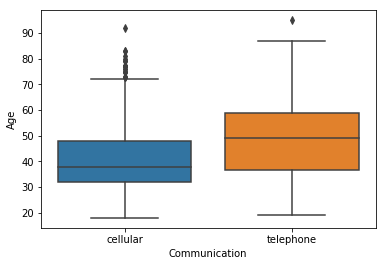

In [20]:
sns.boxplot(X_train['Communication'], X_train['Age'], )

(array([131., 829., 860., 548., 456., 283.,  38.,  37.,  16.,   2.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

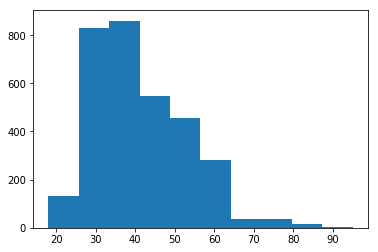

In [21]:
plt.hist(X_train['Age'])

(array([2.036e+03, 7.160e+02, 2.530e+02, 1.120e+02, 5.200e+01, 1.700e+01,
        1.000e+01, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   5. ,  329.8,  654.6,  979.4, 1304.2, 1629. , 1953.8, 2278.6,
        2603.4, 2928.2, 3253. ]),
 <a list of 10 Patch objects>)

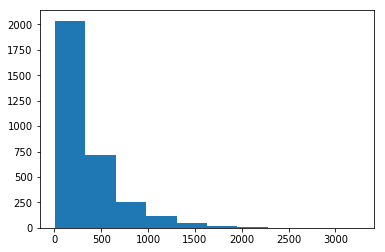

In [22]:
plt.hist(X_train['call_duration'])

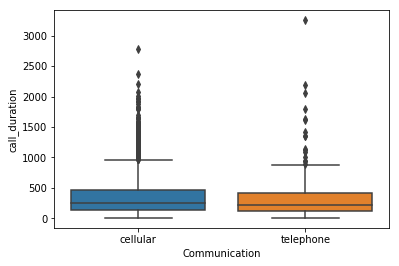

In [23]:
sns.boxplot(X_train['Communication'], X_train['call_duration'], )

In [152]:
pd.crosstab(X_train['Job'], X_train['Communication'])

Communication,cellular,telephone
Job,,
admin.,267,26
blue-collar,346,29
entrepreneur,68,11
housemaid,52,13
management,580,31
retired,136,48
self-employed,77,7
services,168,12
student,85,9


In [142]:
X_train['Education'].unique()

array([nan, 'secondary', 'tertiary', 'primary'], dtype=object)

In [143]:
X_train['Job'].unique()

array(['technician', 'blue-collar', 'self-employed', 'management',
       'retired', 'services', 'admin.', 'housemaid', 'entrepreneur',
       'student', 'unemployed', nan], dtype=object)

# Distribution of target by different categorical features
* Default feature can be removed

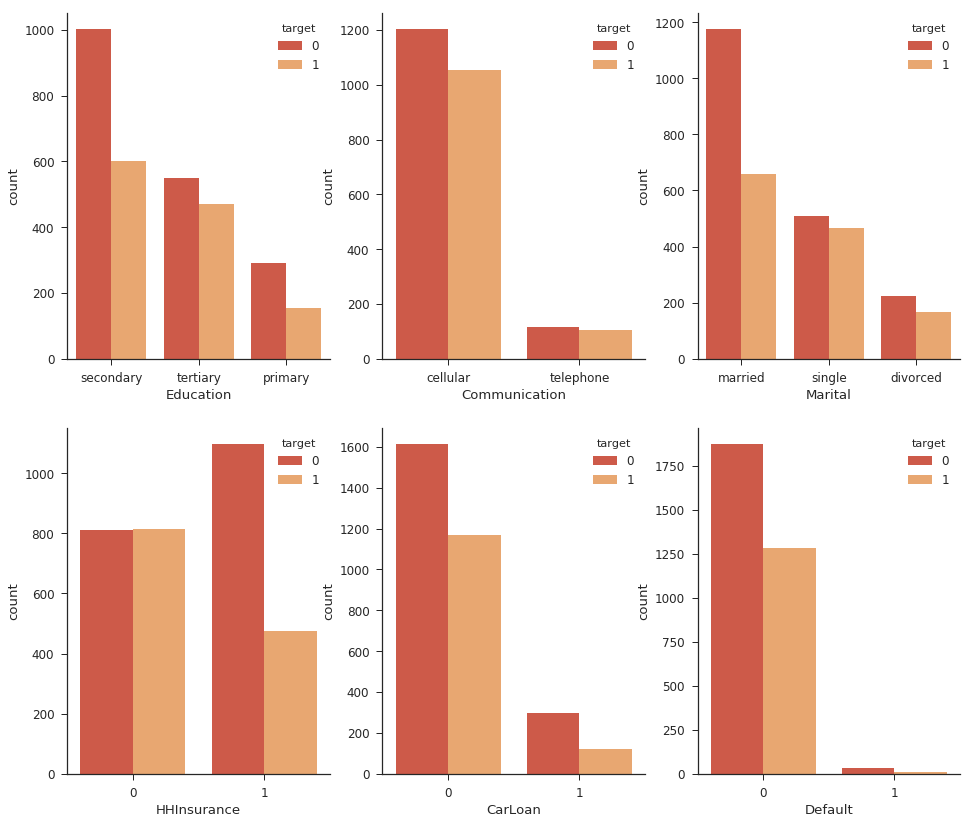

In [59]:
cat_features = ['Education', 'Communication', 'Marital', 'HHInsurance', 'CarLoan', 'Default']
palette_6 = sns.color_palette('RdYlBu')
plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
X_train['target'] = y_train

for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=X_train, x=feature, hue='target', palette=palette_6)  
    
sns.despine()


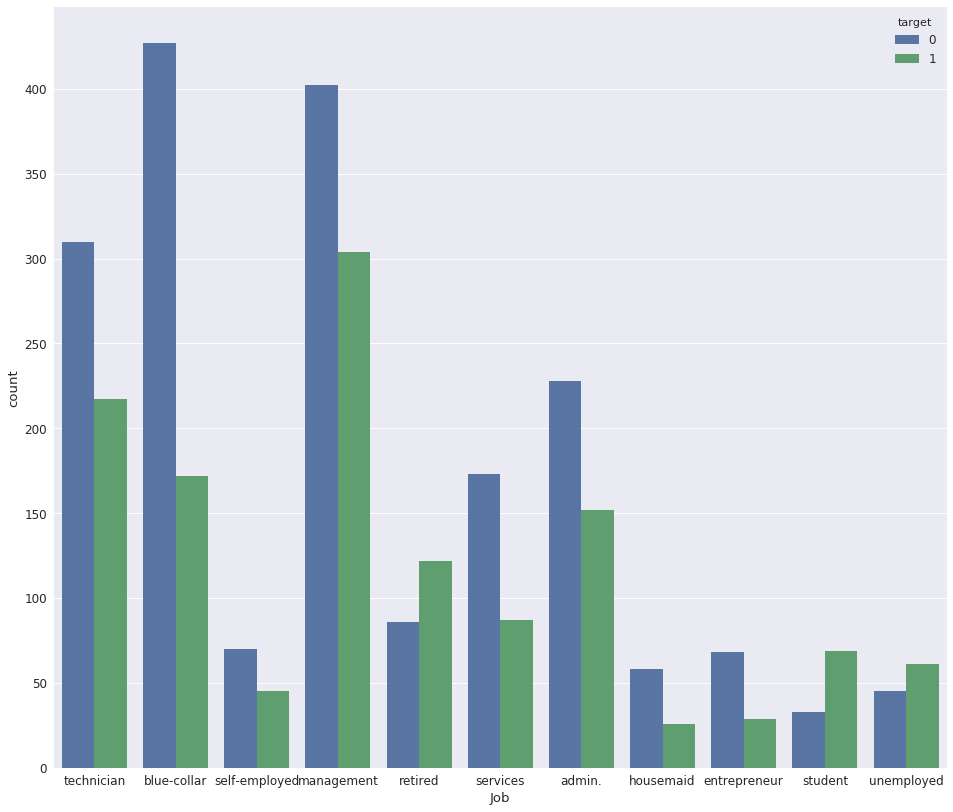

In [61]:
plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.countplot(data=X_train, x='Job', hue='target')

# Last four months have high rate of insurance purchase though very few calls during that period

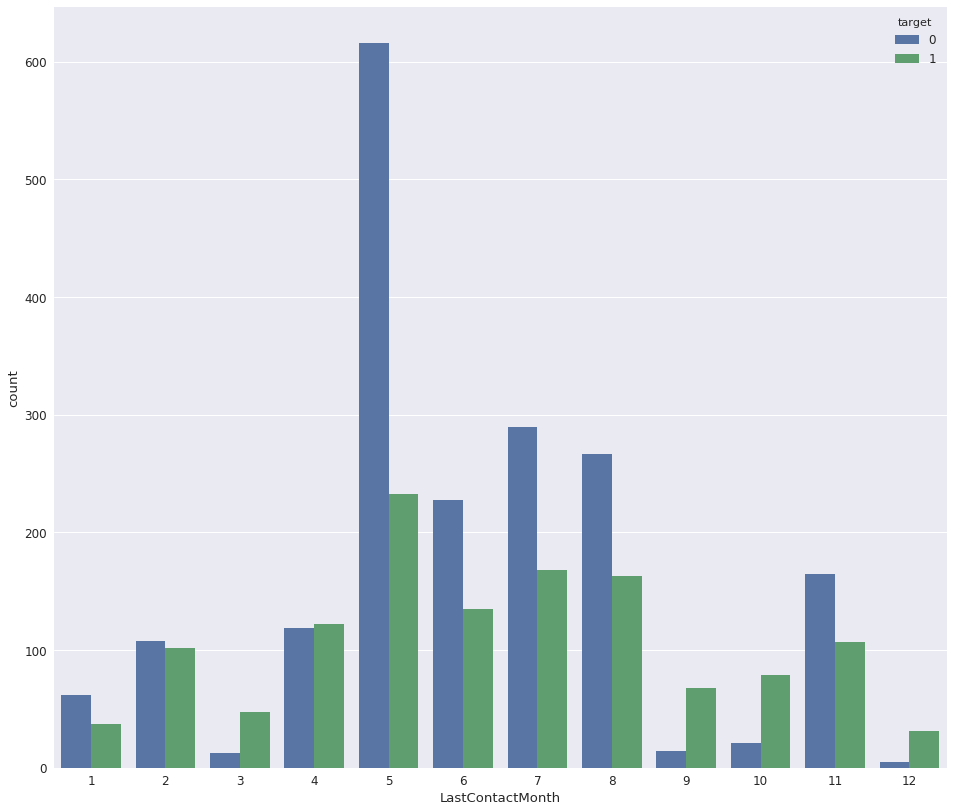

In [77]:
plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.countplot(data=X_train, x='LastContactMonth', hue='target')

In [ ]:
# Third quarter

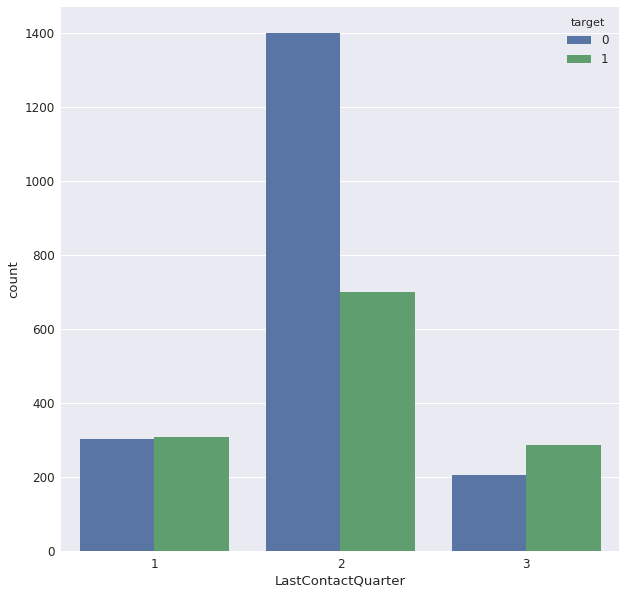

In [85]:
plt.figure(figsize=(10, 10))
sns.set(font_scale= 1.2)
sns.countplot(data=X_train, x='LastContactQuarter', hue='target')

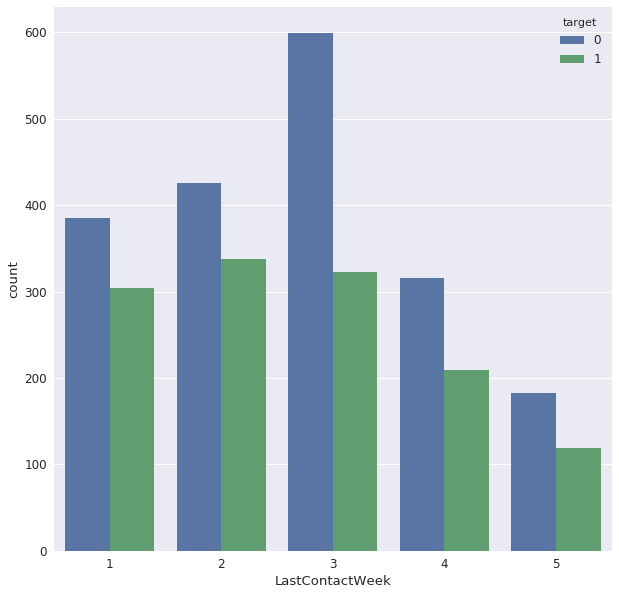

In [86]:
plt.figure(figsize=(10, 10))
sns.set(font_scale= 1.2)
sns.countplot(data=X_train, x='LastContactWeek', hue='target')

In [ ]:
X_train.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'call_duration']

In [144]:
len(X_train[X_train['DaysPassed']<0]['DaysPassed'])

2434

In [145]:
len(X_train[X_train['DaysPassed']>0]['DaysPassed'])

766

(array([2482.,  250.,  217.,  114.,  106.,   18.,    5.,    0.,    3.,
           5.]),
 array([ -1. ,  83.3, 167.6, 251.9, 336.2, 420.5, 504.8, 589.1, 673.4,
        757.7, 842. ]),
 <a list of 10 Patch objects>)

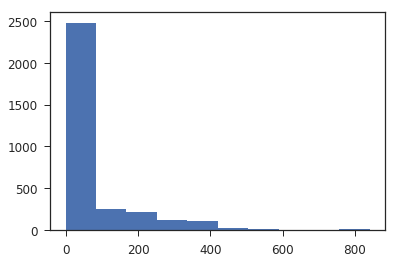

In [140]:
plt.hist(X_train['DaysPassed'])

(array([2.902e+03, 2.120e+02, 5.200e+01, 1.800e+01, 1.000e+01, 0.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

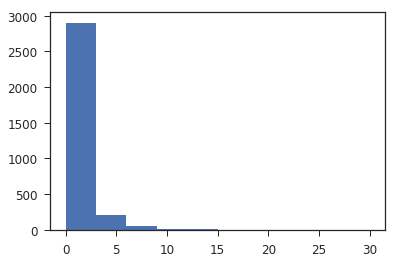

In [141]:
plt.hist(X_train['PrevAttempts'])

In [146]:
len(X_train[X_train['PrevAttempts']==0]['PrevAttempts'])

2434

# Distribution plots for numerical variables
* Most of the variables follow a skewed distribution

/home/vignesh/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


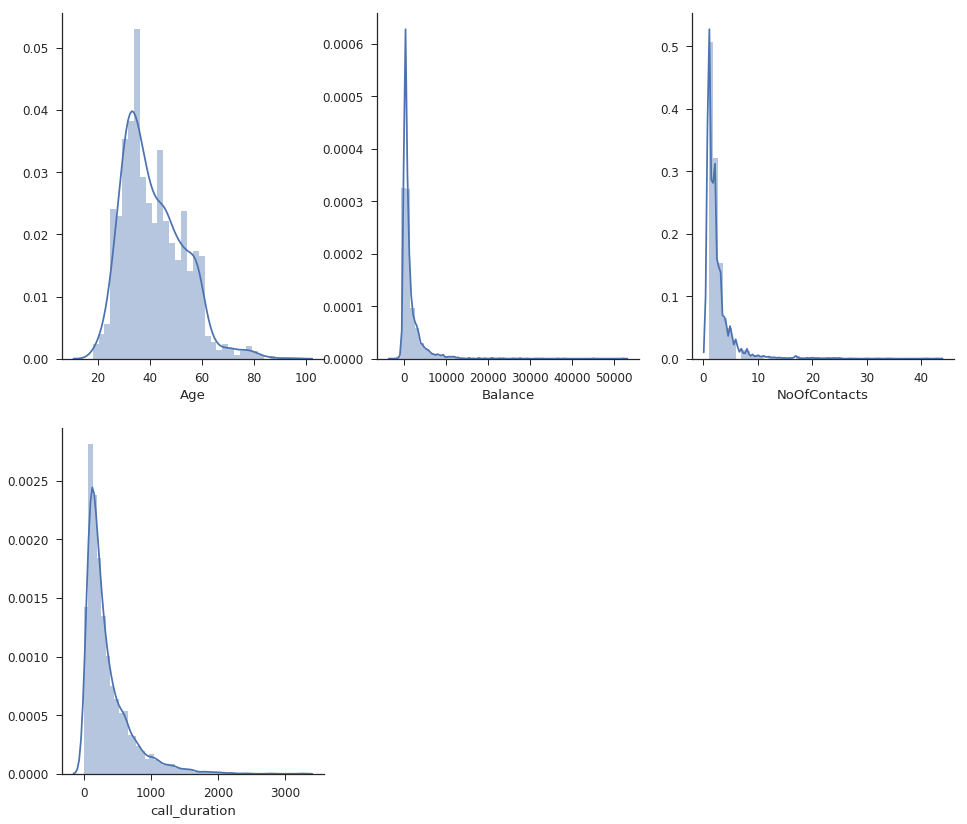

In [135]:
cat_features = ['Age', 'Balance', 'NoOfContacts', 'call_duration']
palette_6 = sns.color_palette('RdYlBu')
plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
X_train['target'] = y_train

for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    sns.distplot(X_train[feature])  
    
sns.despine()


In [198]:
X_train[X_train['NoOfContacts']>8].groupby('target').size()

target
0    92
1    16
dtype: int64

# People are not interested if the number of calls exceed 8 


In [205]:
X_train.groupby(['NoOfContacts','target']).size()

NoOfContacts  target
1             0         738
              1         626
2             0         531
              1         332
3             0         241
              1         171
4             0         115
              1          60
5             0          91
              1          42
6             0          51
              1          23
7             0          25
              1          11
8             0          24
              1          11
9             0          15
              1           1
10            0          12
              1           2
11            0           5
              1           7
12            0           9
13            0           5
              1           1
14            0           5
15            0           2
              1           1
16            0           3
17            0           8
              1           2
18            0           2
19            0           3
20            0           4
21            0           2

# Higher the call duration, more likely the customer is likely to purchase 

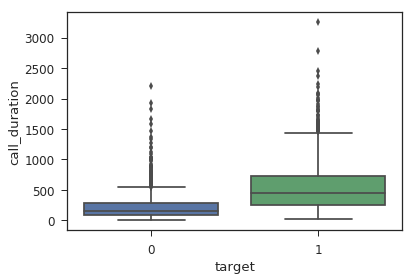

In [207]:
sns.boxplot(X_train['target'], X_train['call_duration'])

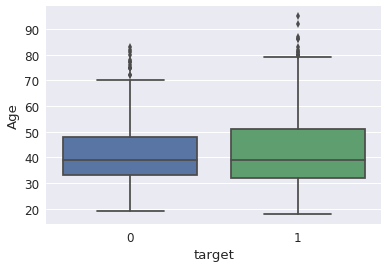

In [89]:
sns.boxplot(X_train['target'], X_train['Age'])

In [208]:
X_train[X_train['Balance']<0].groupby('target').size()

target
0    165
1     46
dtype: int64

/home/vignesh/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


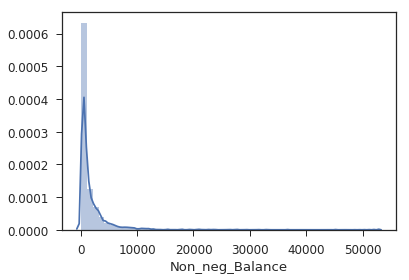

In [209]:
X_train['Non_neg_Balance'] = X_train['Balance'].apply(lambda x : 0 if x<0 else x)
sns.distplot(X_train['Non_neg_Balance'])

# Balance has no relation with the car insurance purchase directly

## No distribution change with the customers having low, medium and high balance

In [210]:
print('------- Low balance  ', len(X_train[X_train['Non_neg_Balance']==0]))
low_balance = X_train[X_train['Non_neg_Balance']<500]
print(low_balance.groupby('target').size())

print('------- medium balance  ', len(X_train[X_train['Non_neg_Balance']<500]))
med_balance = X_train[(X_train['Non_neg_Balance']>500) & (X_train['Non_neg_Balance']<3000)]
print(med_balance.groupby('target').size())

print('------- high balance  ', len(X_train[(X_train['Non_neg_Balance']>500) & (X_train['Non_neg_Balance']<3000)]))
high_balance = X_train[X_train['Non_neg_Balance']>3000]
print(high_balance.groupby('target').size())

------- Low balance   460
target
0    994
1    553
dtype: int64
------- medium balance   1547
target
0    678
1    540
dtype: int64
------- high balance   1218
target
0    235
1    199
dtype: int64


In [148]:
non_previously_contacted_clients = X_train[X_train['PrevAttempts']==0]
previously_contacted_clients = X_train[X_train['PrevAttempts']>0]

In [149]:
non_previously_contacted_clients.groupby('target').size()

target
0    1596
1     838
dtype: int64

In [150]:
previously_contacted_clients.groupby('target').size()

target
0    312
1    454
dtype: int64

# Marginal distributional change in the dayspassed in the purchased and non purchased customers

* Maybe target recent customers

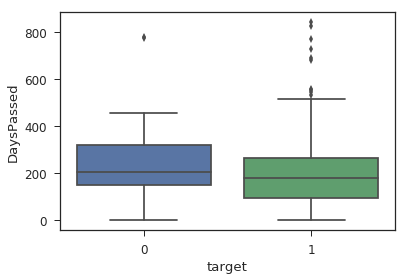

In [154]:
sns.boxplot(previously_contacted_clients['target'], previously_contacted_clients['DaysPassed'])

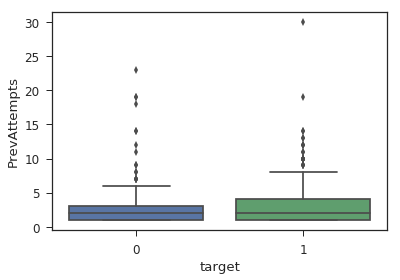

In [155]:
sns.boxplot(previously_contacted_clients['target'], previously_contacted_clients['PrevAttempts'])